# IPL Win probability prediction

Indian Premier League (IPL) is a Twenty20 cricket format league in India. It is usually played in April and May every year. As of 2019, the title sponsor of the game is Vivo. The league was founded by Board of Control for Cricket India (BCCI) in 2008.

<br><br>Given a match in it's second innings we will try to predict which team is more likely to win the game

For our prediction we will be needing:
- Batting team
- Bowling team
- Target
- Score
- Overs
- Current Runrate
- Required Runrate
- Wickets fallen
- Venue (home/away)

## Importing dependencies

In [6]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

## Loading Dataset

In [7]:
matches = pd.read_csv('./Dataset/matches.csv')
deliveries = pd.read_csv('./Dataset/deliveries.csv')

## Data info

In [3]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [101]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [102]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

## EDA

In [103]:
sns.set_style("darkgrid")

In [104]:
df = matches.copy()
Main_teams = ['Chennai Super Kings','Delhi Capitals','Kings XI Punjab','Kolkata Knight Riders','Mumbai Indians','Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad']
df['team1'] = df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df['team2'] = df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df['team1'] = df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2'] = df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2'] = df['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['team1'] = df['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['winner'] = df['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
df['winner'] = df['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['winner'] = df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

df['winner'] = df['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')

wins = df["winner"].value_counts().to_frame(name="Number of Wins")
t1 = df['team1'].value_counts().to_frame(name="num")
t2 = df['team2'].value_counts().to_frame(name="num")
team_matches = t2+t1
team_matches = team_matches.sort_values(by='num',ascending=False)

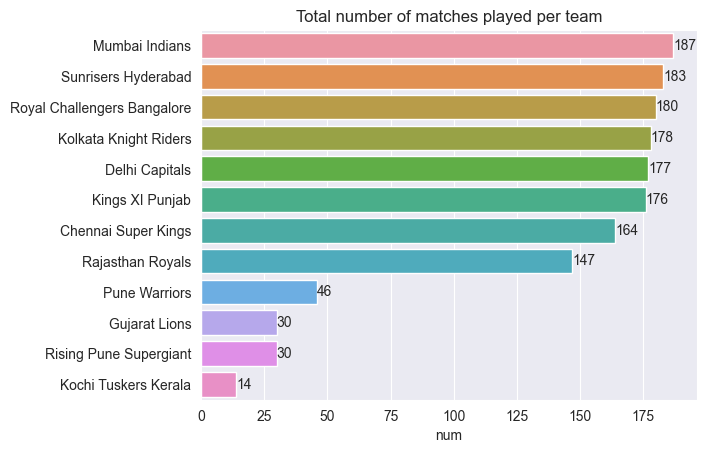

In [105]:
ax = sns.barplot(y=team_matches.index, x =team_matches['num'], orient='h')
ax.bar_label(ax.containers[0])
ax.set(title="Total number of matches played per team")
plt.show()

- Main 8 teams have played similar number of matches except CSK and RR due to the 2 year ban
- rest of the 4 teams did not play all the seasons

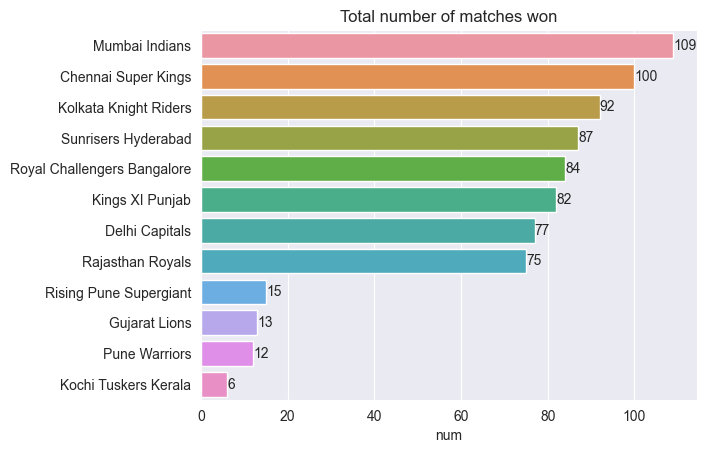

In [106]:
wins = df['winner'].value_counts().to_frame(name='num')
win_percent = ((wins*100)//team_matches)
win_percent = win_percent.sort_values(by = 'num',ascending=False)
ax = sns.barplot(y=wins.index, x =wins['num'], orient='h')
ax.bar_label(ax.containers[0])
ax.set(title='Total number of matches won')
plt.show()

- Mummbai seems to have won the highest number of matches followed by Chennai and Kolkata
- but there might be a problem here because all teams did not play all the seasons
<br> So let us try to check the winning percentage based on the number of games played

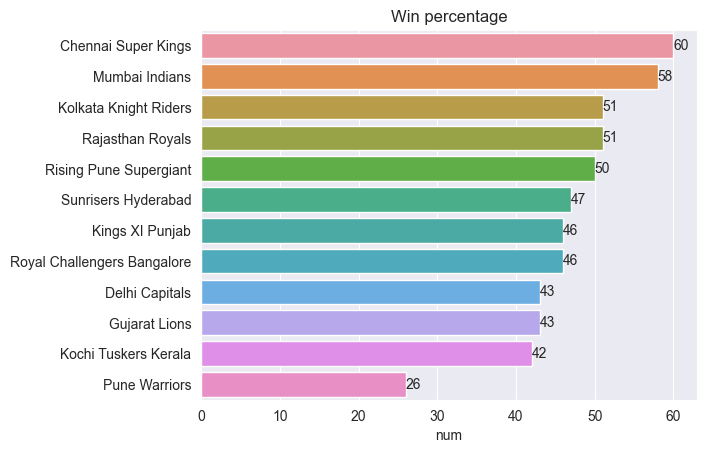

In [107]:
ax = sns.barplot(y=win_percent.index, x =win_percent['num'], orient='h', errwidth=0)
ax.bar_label(ax.containers[0])
ax.set(title="Win percentage")
plt.show()

- CSK is in top when it comes to the win percentage

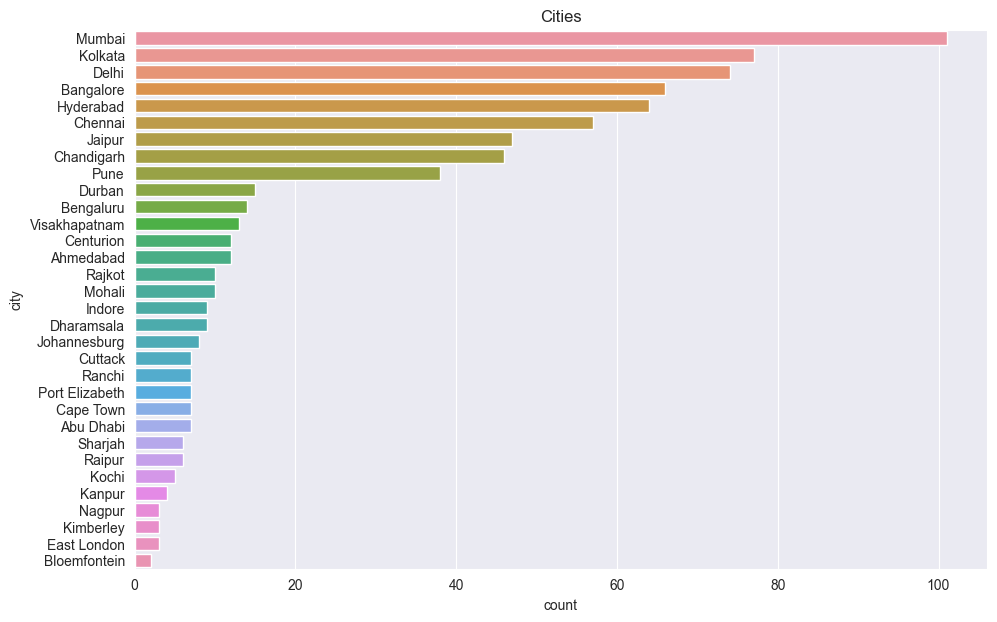

In [108]:
plt.subplots(figsize=(11,7))
sns.countplot(y=matches['city'], orient='h', order=matches['city'].value_counts().index).set(title='Cities')
plt.show()

- We can see that main 8 teams have played in their home for most of the times

In [109]:
toss = (df['toss_winner'] == df['winner']).to_frame('wins')
field = df[df['toss_winner'] == df['winner']]
field = (field['toss_decision']=='field').to_frame('wins')
(df['toss_winner'] == df['winner']).value_counts()

False    420
True     336
dtype: int64

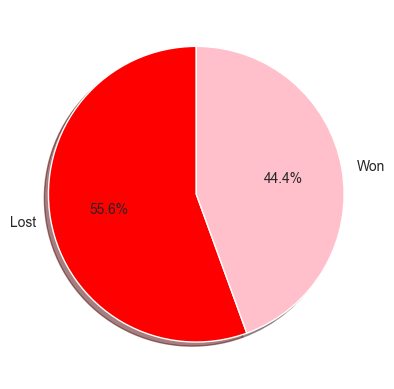

In [110]:
data = [420, 336]
keys = ['Lost', 'Won']
explode = [0.1, 0]
plt.pie(data, labels=keys, startangle = 90,colors  = ['red', 'pink'],shadow = True,autopct='%.1f%%')
#plt.title("Toss vs Result")
plt.show()

- Chances of winning a game given the team had won the toss is 44%

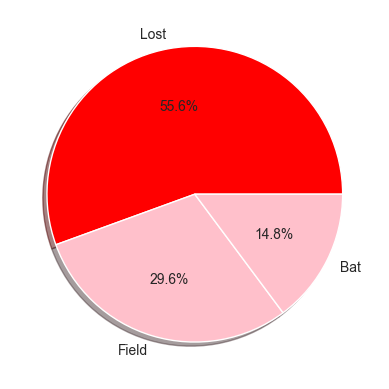

In [111]:
data = [420, 224, 112]
keys = ['Lost', 'Field', 'Bat']
explode = [0.1, 0, 0]
plt.pie(data, labels=keys, autopct='%.1f%%',shadow=True,colors=['red','pink','pink'])
#plt.title("Toss vs Result")
plt.show()

- In that 44% that 30% choose to Field first

In [112]:
toss =df.copy()
l = toss[toss['toss_winner'] != toss['winner']]
(l['toss_decision'] =='field').value_counts()


True     239
False    181
Name: toss_decision, dtype: int64

In [113]:
toss =matches.copy()
toss['toss_decision'].value_counts()
d = pd.DataFrame({'Won':[112,224],'Lost':[ 181,239]},index=['Bat','Field'])
d.head()

,Won,Lost
Bat,112,181
Field,224,239


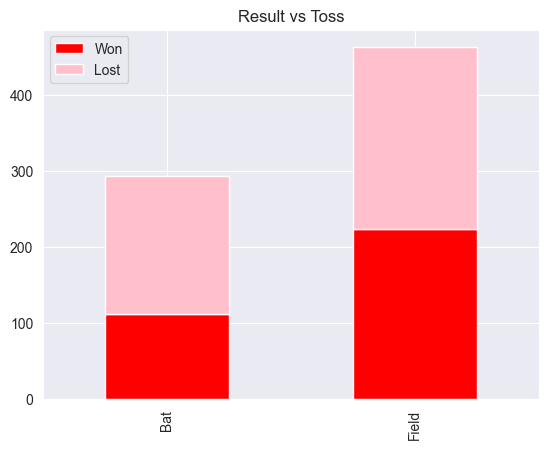

In [114]:
d.plot(kind='bar', stacked=True, color=['red', 'pink']).set(title='Result vs Toss')
plt.show()

- Choosing to field first can really help in winning the game

In [115]:
home = {'Hyderabad': 'Sunrisers Hyderabad',
 'Pune': 'Pune Warriors',
 'Kolkata': 'Kolkata Knight Riders',
 'Mohali': 'Kings XI Punjab',
 'Bangalore': 'Royal Challengers Bangalore',
 'Mumbai': 'Mumbai Indians',
 'Delhi': 'Delhi Capitals',
 'Jaipur': 'Rajasthan Royals',
 'Chennai': 'Chennai Super Kings',
 'Ahmedabad': 'Gujarat Lions',
 'Kochi': 'Kochi Tuskers Kerala'}
'''home_city = home.values()
home_team = home.keys()
home = dict(zip(home_city,home_team))
home'''

'home_city = home.values()\nhome_team = home.keys()\nhome = dict(zip(home_city,home_team))\nhome'

In [116]:
h = df[['winner','city']]
ho = [home.get(i) for i in h.city]
h['home'] = ho
h = h.dropna()
(h['winner'] == h['home']).value_counts()


C:\Users\nitis\AppData\Local\Temp\ipykernel_13576\2810400931.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  h['home'] = ho


True     278
False    270
dtype: int64

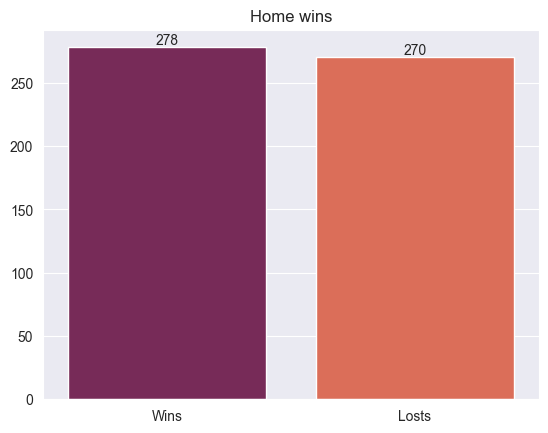

In [117]:
ax = sns.barplot(y=[278,270],x=['Wins','Losts'], errwidth=0, palette='rocket')
ax.bar_label(ax.containers[0])
ax.set(title="Home wins")
plt.show()

- Playing in home might not really affect the game's result

In [118]:
matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [8]:
def player_performance(player,team,runs):
    msd = deliveries.copy()
    msd = msd[msd['batting_team'] == team]
    msd = msd[msd['batsman'] == player]
    msd = msd.groupby(['match_id','inning']).sum(True)['total_runs'].reset_index()
    csk = matches.copy()
    csk['match_id'] = csk['id']
    csk = csk[['match_id','winner']]
    msd = msd.merge(csk, on='match_id')
    print(f"{player} batted {msd.shape[0]} matches")
    msd_win = msd[msd['winner']==team]
    print(f"{player} batted and won {msd_win.shape[0]} matches")
    msd_50 = msd[msd['total_runs']>= runs]
    w50 = msd_50.shape[0]
    print(f"{player} scored > {runs} in {w50} matches")
    msd_50_win = msd_50[msd_50['winner']==team]
    win50 = msd_50_win.shape[0]
    print(f"{player} scored > {runs} and won {win50} matches")
    title = f"Chances of {team} winning if {player} hits more than {runs} is"
    print(f"{title}: {round((win50/w50),3)*100}%")
    pieplt(win50/w50,1-win50/w50,title)
def pieplt(win,lost,title):
    labels = ['Lost', 'Won']

    Salary = [win, lost]
    colors = ['#FF0000', '#0000FF']
    explode = (0.05, 0.05,)
    plt.pie(Salary, colors=colors,startangle=90, textprops={'color':"w"},
            autopct='%1.1f%%', pctdistance=0.85)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    plt.legend(labels, loc="upper right")
    fig.gca().add_artist(centre_circle)
    plt.title(title)
    plt.show()

SK Raina batted 161 matches
SK Raina batted and won 97 matches
SK Raina scored > 50 in 35 matches
SK Raina scored > 50 and won 24 matches
Chances of Chennai Super Kings winning if SK Raina hits more than 50 is: 68.60000000000001%


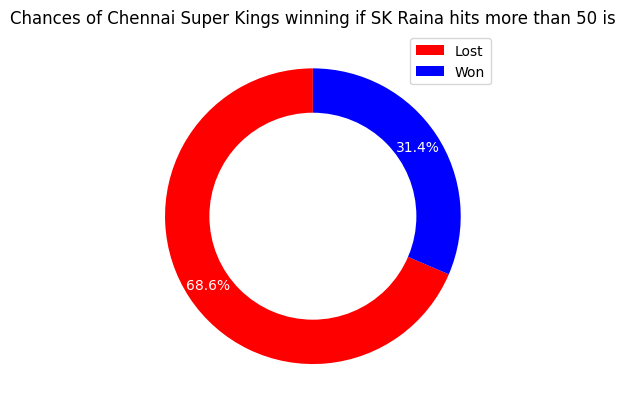

In [9]:
player_performance('SK Raina', "Chennai Super Kings",50)

## Processing Data

Let us calculate the scores of everymatch

In [41]:
totalruns = deliveries.groupby(['match_id','inning']).sum(True)['total_runs'].reset_index()

totalruns.head()

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183


Let us add the total scores to matches dataset

In [42]:
df = matches.merge(totalruns[['match_id','total_runs']],left_on='id',right_on='match_id')
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,172
2,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
3,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,187
4,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183


Since the inception several teams have changed their names

In [43]:
df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

We will replace the older names with the current(2019) names

In [44]:
Main_teams = ['Chennai Super Kings','Delhi Capitals','Kings XI Punjab','Kolkata Knight Riders','Mumbai Indians','Rajasthan Royals','Royal Challengers Bangalore','Sunrisers Hyderabad']

In [45]:
df['team1'] = df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
df['team2'] = df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')
df['team1'] = df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2'] = df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['team2'] = df['team2'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['team1'] = df['team1'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['winner'] = df['winner'].str.replace('Delhi Daredevils','Delhi Capitals')
df['winner'] = df['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
df['winner'] = df['winner'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
df['winner'] = df['winner'].str.replace('Rising Pune Supergiants','Rising Pune Supergiant')
print(df.shape)
df.head()

(1528, 20)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,172
2,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
3,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,187
4,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183


There were addition of few teams in some seasons, which are not neccessary for our model, let us remove them

In [46]:
df = df[df['team1'].isin(Main_teams)]
df = df[df['team2'].isin(Main_teams)]
print(df.shape)
df.head()

(1297, 20)


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,172
8,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
9,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,142
12,7,IPL-2017,Mumbai,09-04-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,178


Due to bad weahter conditions few matches were not played for full 20 overs and DL was applied insead

In [47]:
df.dl_applied.value_counts()

0    1267
1      30
Name: dl_applied, dtype: int64

Our model does not need those observations with DL

In [48]:
df = df[df['dl_applied']==0]

In [49]:
df.shape

(1267, 20)

Required features from matches dataset are City, Winner and Total runs

In [50]:
df = df[['match_id','city','winner','total_runs']]
df = df.reset_index(drop=True)
df.head()

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
1,1,Hyderabad,Sunrisers Hyderabad,172
2,5,Bangalore,Royal Challengers Bangalore,157
3,5,Bangalore,Royal Challengers Bangalore,142
4,7,Mumbai,Mumbai Indians,178


Merging matches dataset with Deliveries dataset

In [51]:
df = df.merge(deliveries, on='match_id')
df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


Our Model will predict winning probability only on the second innings

In [52]:
df = df[df['inning']==2]
df.shape

(146822, 24)

In [53]:
df = df.reset_index(drop=True)
df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


player dismissed will indicates if player is out or not

We can use it to calculate wickets fallen, firstly let's encode them (0 if out else 1)

In [54]:
df['player_dismissed'] = df['player_dismissed'].fillna('0')
df['player_dismissed'] = df['player_dismissed'].apply(lambda x : x if x == '0' else '1')
df['player_dismissed'] = df['player_dismissed'].astype('int')

In [55]:
df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,0,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,0,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,0,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,0,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,0,NaN,NaN


Calculating the wickets fallen

In [56]:
wickets = df.groupby('match_id').cumsum()['player_dismissed'].values
df['wickets'] = 10 - wickets
df.head()

C:\Users\nitis\AppData\Local\Temp\ipykernel_10584\1157259427.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,wickets
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1,0,NaN,NaN,10
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,10
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,10
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2,0,NaN,NaN,10
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4,0,NaN,NaN,10


In [57]:
df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'wickets'],
      dtype='object')

Calculating Current Score using cumsum

In [58]:
df['current_score'] = df.groupby('match_id').cumsum()['total_runs_y']
df.head()

C:\Users\nitis\AppData\Local\Temp\ipykernel_10584\2449684235.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df['current_score'] = df.groupby('match_id').cumsum()['total_runs_y']


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,wickets,current_score
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1,0,NaN,NaN,10,1
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,10,1
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,NaN,NaN,10,1
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2,0,NaN,NaN,10,3
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4,0,NaN,NaN,10,7


Calculating Runs left by subtracting current score from total runs

In [59]:
df['runs_left'] = df['total_runs_x']-df['current_score']
df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,wickets,current_score,runs_left
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,0,NaN,NaN,10,1,206
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,10,1,206
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,NaN,NaN,10,1,206
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,0,NaN,NaN,10,3,204
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,0,NaN,NaN,10,7,200


Calculating balls_left = 126-(over*6+current_ball)

In [60]:
df['balls_left'] = 126 - (df['over']*6+df['ball'])
df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,wickets,current_score,runs_left,balls_left
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,10,1,206,119
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,10,1,206,118
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,10,1,206,117
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,10,3,204,116
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,10,7,200,115


Calculating Run rate:
- Current runrate = $\frac{(current score * 6)}{120 - ballsleft}$
- Required runrate = $\frac{runsleft * 6}{ballsleft}$

In [61]:
df['current_rr'] = (df['current_score']*6)/(120-df['balls_left'])
df['required_rr'] = (df['runs_left']*6)/(df['balls_left'])
df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,wickets,current_score,runs_left,balls_left,current_rr,required_rr
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,10,1,206,119,6.0,10.386555
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,10,1,206,118,3.0,10.474576
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,10,1,206,117,2.0,10.564103
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,10,3,204,116,4.5,10.551724
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,10,7,200,115,8.4,10.434783


Encoding winner column:
- 1 if batting team won
- 0 otherwise

In [62]:
df['result'] = df.apply(lambda row: 1 if row['batting_team']==row['winner'] else 0, axis=1)
df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,wickets,current_score,runs_left,balls_left,current_rr,required_rr,result
0,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,NaN,NaN,10,1,206,119,6.0,10.386555,0
1,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,10,1,206,118,3.0,10.474576,0
2,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,10,1,206,117,2.0,10.564103,0
3,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,NaN,NaN,10,3,204,116,4.5,10.551724,0
4,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,NaN,NaN,10,7,200,115,8.4,10.434783,0


Selecting only required features:
- batting_team
- bowling_team
- city
-runs_left
- balls_left
- wickets
- total_runs_x
- current_rr
- required_rr
- result

In [63]:
fdf = df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','current_rr','required_rr','result']]

In [64]:
fdf.head(5)

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_rr,required_rr,result
0,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.0,10.386555,0
1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.0,10.474576,0
2,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.0,10.564103,0
3,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.5,10.551724,0
4,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.4,10.434783,0


Checking for null values

In [65]:
fdf.isnull().sum()

batting_team       0
bowling_team       0
city            1664
runs_left          0
balls_left         0
wickets            0
total_runs_x       0
current_rr         0
required_rr        7
result             0
dtype: int64

Dropping null values

In [66]:
fdf = fdf.dropna()
fdf.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
current_rr      0
required_rr     0
result          0
dtype: int64

In [67]:
fdf = fdf[fdf['balls_left']!=0]

defining X and y

In [68]:
X = fdf.drop(['result'],axis=1)
y = fdf['result']

In [69]:
fdf.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_rr,required_rr,result
0,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.0,10.386555,0
1,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.0,10.474576,0
2,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.0,10.564103,0
3,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.5,10.551724,0
4,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.4,10.434783,0


In [70]:
df.match_id.value_counts()

126      520
190      512
476      508
388      500
11146    492
        ... 
452      100
35        98
99        76
11340     40
571       14
Name: match_id, Length: 625, dtype: int64

## Model

Splitting data for train and test

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

X_train.shape,X_test.shape

((115731, 9), (28933, 9))

In [72]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'current_rr', 'required_rr'],
      dtype='object')

In [73]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

Defining a pipeline for onehot encoding

In [74]:
cf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')

In [75]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,current_rr,required_rr
95840,Mumbai Indians,Kings XI Punjab,Chandigarh,95,86,10,156,10.764706,6.627907
5248,Sunrisers Hyderabad,Mumbai Indians,Hyderabad,132,115,10,138,7.200000,6.886957
57872,Kolkata Knight Riders,Rajasthan Royals,Jaipur,164,119,10,164,0.000000,8.268908
97206,Chennai Super Kings,Royal Challengers Bangalore,Bangalore,-99,43,6,160,20.181818,-13.813953
96355,Sunrisers Hyderabad,Chennai Super Kings,Ranchi,75,55,10,185,10.153846,8.181818
...,...,...,...,...,...,...,...,...,...
73611,Rajasthan Royals,Kings XI Punjab,Jaipur,-4,119,6,126,780.000000,-0.201681
111305,Chennai Super Kings,Royal Challengers Bangalore,Ranchi,92,72,9,139,5.875000,7.666667
50227,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata,-117,50,9,175,25.028571,-14.040000
5210,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,-120,61,4,159,28.372881,-11.803279


Defining model pipeline

Logistic regression

In [76]:
pipe = Pipeline(steps=[
    ('step1',cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

# fitting the training data

pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [77]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8544222859710365
              precision    recall  f1-score   support

           0       0.88      0.85      0.86     15776
           1       0.83      0.86      0.84     13157

    accuracy                           0.85     28933
   macro avg       0.85      0.85      0.85     28933
weighted avg       0.86      0.85      0.85     28933



In [67]:
pipe.predict_proba(X_test)[10]

array([0.91755303, 0.08244697])

Random Forest

In [79]:
pipe2 = Pipeline(steps=[
    ('step1',cf),
    ('step2',RandomForestClassifier())
])

pipe2.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))
print(classification_report(y_test,pipe2.predict(X_test)))

0.9995852486779802
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15776
           1       1.00      1.00      1.00     13157

    accuracy                           1.00     28933
   macro avg       1.00      1.00      1.00     28933
weighted avg       1.00      1.00      1.00     28933



In [69]:
pipe2.predict_proba(X_test)[10]

array([0.99, 0.01])

In [71]:
y_test[10]

0

We can see that Random Forest performs very well